In [33]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")

In [34]:
df = pd.read_csv("porosity_density_velocity_by_lithology.csv")

In [35]:
lasfile = lasio.read("36_7-3.las")

logs = lasfile.df()


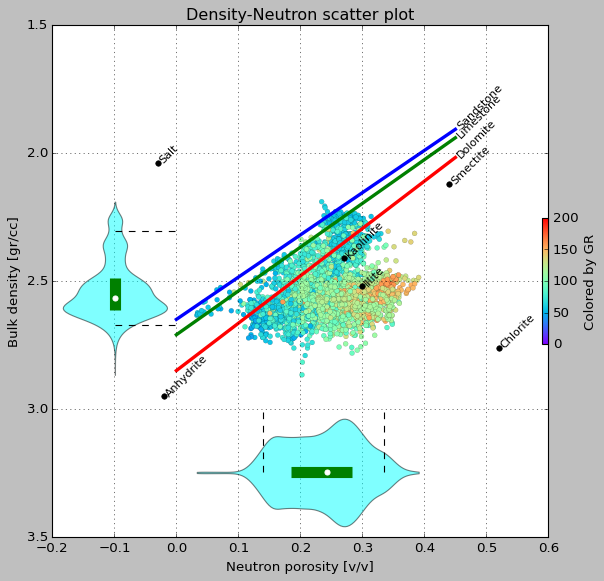

In [38]:
fig = plt.figure(figsize=(8,8))


#Main scatter area
ax1=fig.add_subplot(3, 3, (1, 9))
#Left violin
ax0=fig.add_subplot(3, 3, (1, 7))
#Bottom violin
ax3=fig.add_subplot(3, 3, (7, 9))
#Colorbar
ax4=fig.add_subplot(10, 10, (10, 100))
ax4.axis("off")

#Chart lines and points
for litho in df.Lithology.unique():
    dflitho = df.loc[df["Lithology"] == litho]
    if dflitho["Lithology"].count() > 1:
        ax1.plot(dflitho["Neutron porosity"], dflitho["Bulk density"], "-", lw=3, label=litho)
        ax1.annotate(litho, (dflitho["Neutron porosity"].iloc[-1], dflitho["Bulk density"].iloc[-1]), rotation=45, fontsize="small")
    else:
        ax1.plot(dflitho["Neutron porosity"], dflitho["Bulk density"], "o", c="k", ms=5, label=litho)
        ax1.annotate(litho, (dflitho["Neutron porosity"], dflitho["Bulk density"]), rotation=45, fontsize="small")
        #bbox={'facecolor': 'white', "edgecolor": "white", 'alpha': 1, 'pad': 10}

#Log data scatter
ax1.set_title("Density-Neutron scatter plot")
scatter = ax1.scatter(logs["NPHI"], logs["RHOB"], c=logs["GR"], cmap="rainbow", vmin=0, vmax=200, s=20, alpha=1, label="Logs", linewidth=0.1)

ax1.set_xlabel("Neutron porosity [v/v]")
ax1.set_ylabel("Bulk density [gr/cc]")

ax1.set_xlim(-0.2, 0.6)
ax1.set_ylim(3.5, 1.5)
ax1.grid(True)

violins0 = ax0.violinplot(logs["RHOB"].dropna(),  vert=True, showextrema=False)
violins0["bodies"][0].set_facecolor("cyan")
violins0["bodies"][0].set_edgecolor("black")
violins0["bodies"][0].set_alpha(0.5)

ax0.scatter(1, logs["RHOB"].median(), color="white", zorder=3)
ax0.vlines(1, logs["RHOB"].quantile(0.25), logs["RHOB"].quantile(0.75), color="green", lw=10)
ax0.hlines(logs["RHOB"].quantile(0.05), 1, 1.3, color="k", lw=1, ls="--")
ax0.hlines(logs["RHOB"].quantile(0.95), 1, 1.3, color="k", lw=1, ls="--")

ax0.set_ylim(3.5, 1.5)
ax0.axis("off")

violins1 = ax3.violinplot(logs["NPHI"].dropna(), vert=False, showextrema=False)
violins1["bodies"][0].set_facecolor("cyan")
violins1["bodies"][0].set_edgecolor("black")
violins1["bodies"][0].set_alpha(0.5)

ax3.scatter(logs["NPHI"].median(), 1, color="white", zorder=3)
ax3.hlines(1, logs["NPHI"].quantile(0.25), logs["NPHI"].quantile(0.75), color="green", lw=10)
ax3.vlines(logs["NPHI"].quantile(0.05), 1, 1.3, color="k", lw=1, ls="--")
ax3.vlines(logs["NPHI"].quantile(0.95), 1, 1.3, color="k", lw=1, ls="--")

ax3.set_xlim(-0.2, 0.6)
ax3.axis("off")

#fig.tight_layout()
fig.colorbar(scatter, ax=ax4, location="right", cmap="rainbow", shrink=0.3, label="Colored by GR")
plt.show()